# Clustering Penguins Species Using Hierarchical Clustering

## Importing The Main Libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

## Importing The Dataset

In [3]:
data = pd.read_csv('/content/penguins.csv')

data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


## EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [5]:
data.isna().sum()

,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,9


In [6]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [7]:
for feature in data.columns:
    fig = px.histogram(data, x= feature)
    fig.show()


In [8]:
for feature in data.columns:
    valueCounts = data[feature].value_counts()
    print ( valueCounts , '\n' )

culmen_length_mm
41.1    7
45.2    6
39.6    5
37.8    5
46.5    5
       ..
41.7    1
53.4    1
55.1    1
48.8    1
49.9    1
Name: count, Length: 164, dtype: int64 

culmen_depth_mm
17.0    12
17.9    10
18.6    10
18.5    10
15.0    10
        ..
13.2     1
13.6     1
13.1     1
13.3     1
14.9     1
Name: count, Length: 80, dtype: int64 

flipper_length_mm
 190.0     21
 195.0     17
 187.0     16
 193.0     15
 210.0     14
 191.0     13
 215.0     12
 197.0     10
 196.0     10
 185.0      9
 208.0      8
 216.0      8
 220.0      8
 189.0      7
 184.0      7
 192.0      7
 181.0      7
 198.0      7
 212.0      7
 230.0      7
 186.0      7
 188.0      6
 213.0      6
 217.0      6
 214.0      6
 201.0      6
 199.0      6
 222.0      6
 219.0      5
 221.0      5
 209.0      5
 218.0      5
 203.0      5
 194.0      5
 180.0      5
 178.0      4
 225.0      4
 228.0      4
 202.0      4
 200.0      4
 182.0      3
 205.0      3
 224.0      3
 223.0      2
 229.0      2
 207.0 

In [9]:
data[data['culmen_length_mm'].isna()]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

## Data Cleaning

In [10]:
data = data[ (data['sex'] != '.') & ( (data['flipper_length_mm'] > 0) & (data['flipper_length_mm'] < 1000) ) ]

In [11]:
data.dropna(inplace=True)

data.isna().sum()

,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.6+ KB


In [13]:
for feature in data.columns:
    fig = px.histogram(data, x= feature)
    fig.show()

### Getting The Features

In [14]:
x = data.copy()

x.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


### Encoding The Categorical Data



In [15]:
mapSex = {'FEMALE' : 0 , 'MALE' : 1}

x['sex'] = x['sex'].map(mapSex)

In [16]:
x.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


### Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 'sex' has already been numerically encoded and should not be scaled further.
columnsToScale = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm' ,'body_mass_g' ]
x[columnsToScale] = scaler.fit_transform(x[columnsToScale])
x.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.903906,0.790360,-1.425342,-0.566948,1
1,-0.830434,0.126187,-1.068577,-0.504847,0
2,-0.683490,0.432728,-0.426399,-1.187953,0
4,-1.344738,1.096901,-0.569105,-0.939551,0
5,-0.867170,1.761074,-0.783164,-0.691149,1


## Model Training

### Dendogram to get optimal K
      

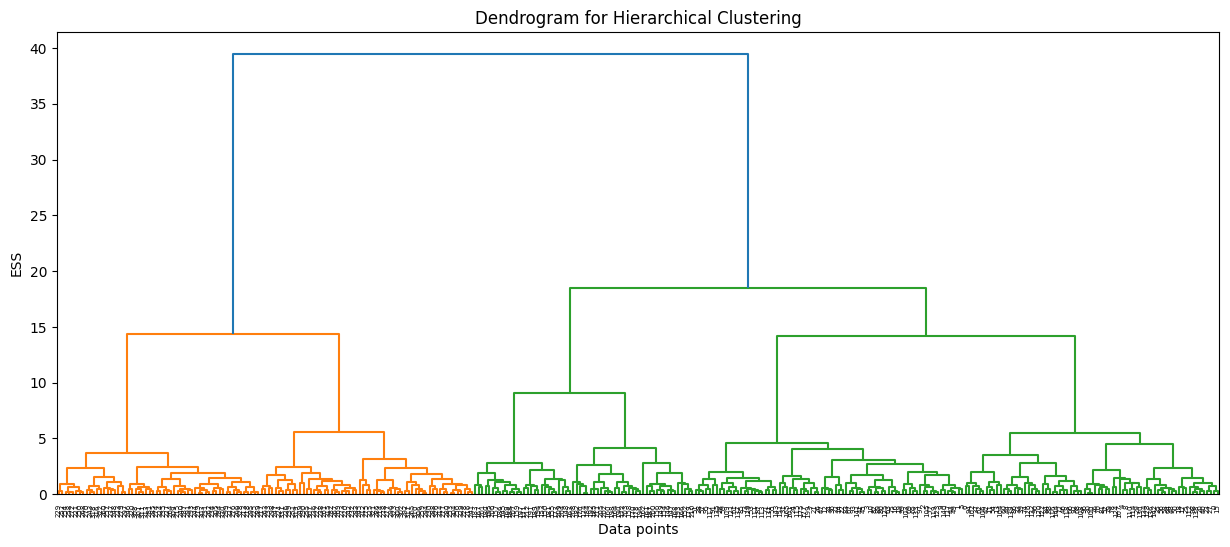

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(x, method='ward')

plt.figure(figsize=(15, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='decreasing',
           show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data points')
plt.ylabel('ESS')
plt.show()

### Traing the K-means Model with the optimal K

In [21]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering ( n_clusters = 2 , metric = 'euclidean' , linkage = 'ward' )
clusters = hc.fit_predict( x )
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Visualizing the results

In [23]:
data['cluster'] = clusters
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,39.1,18.7,181.0,3750.0,MALE,0
1,39.5,17.4,186.0,3800.0,FEMALE,0
2,40.3,18.0,195.0,3250.0,FEMALE,0
4,36.7,19.3,193.0,3450.0,FEMALE,0
5,39.3,20.6,190.0,3650.0,MALE,0


In [26]:
fig = px.scatter(data, x='culmen_length_mm', y='culmen_depth_mm', color='cluster',
                 title='Penguin Clusters by Culmen Length and Depth',
                 hover_data=['sex'])
fig.show()